## Importando iris dataset e transformando em dataframe

In [59]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
x_values = pd.DataFrame(iris.data,columns=iris.feature_names)
y_values = pd.DataFrame(iris.target,columns=['target'])
irisDataFrame = pd.concat([x_values, y_values], axis=1)
irisDataFrame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Definindo funcao test_normal_results

In [60]:
def test_normal_results(dados,lista_de_colunas=''):
    #importando bibliotecas
    from scipy import stats
    import scipy
    import matplotlib.pyplot as plt
    
    #carrega dados e cria lista de colunas
    data=dados
    if lista_de_colunas=='':
        columns_list=data.columns.tolist()
        #print("columns_list",columns_list)
    else:
        columns_list=lista_de_colunas
        
    #loop para cada conjunto de dados com base na quantidade de conjuntos
    norm=[]
    for i in range(0,len(columns_list)):
        #print("i len column_list",columns_list[i],)
        
        #cria os graficos
        plt.hist(data[columns_list[i]])
        plt.title(columns_list[i])
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.show()
        print("Results: %s"%columns_list[i])
        #print("Statistic %f"%norm[i][0])
        #print("pvalue %f"%norm[i][1])
        
        # verifica se e uma distribuicao normal com base em cada coluna de dados
        norm.append(scipy.stats.normaltest(data[columns_list[i]]))
        #obtem valor p e k2
        k2, p = stats.normaltest(data[columns_list[i]])
        #define alpha como margem 
        alpha = 1e-3
        #imprime valor p
        print("p = {:g}".format(p))
        #imprime valor k2
        print("k2 = {:g}".format(k2))
        if p < alpha:  # null hypothesis: x comes from a normal distribution
            print("The null hypothesis can be rejected, NÃO É UMA DISTRIBUICAO NORMAL")
        else:
            print("The null hypothesis cannot be rejected, É UMA DISTRIBUICAO NORMAL")
            
            
            
        print("        Statistic %f  --  pvalue %f"%(norm[i][0],norm[i][1]))
        print('==============================================================')
    print(""" OBSERVACOES SOBRE RESULTADO

        statistic : float or array
            s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.

        pvalue : float or array
            A 2-sided chi squared probability for the hypothesis test.
    """)

## Chamando funcao Normal Results

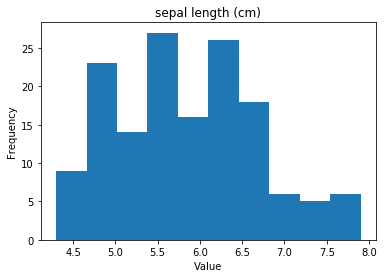

Results: sepal length (cm)
p = 0.0568242
k2 = 5.73558
The null hypothesis cannot be rejected, É UMA DISTRIBUICAO NORMAL
        Statistic 5.735584  --  pvalue 0.056824


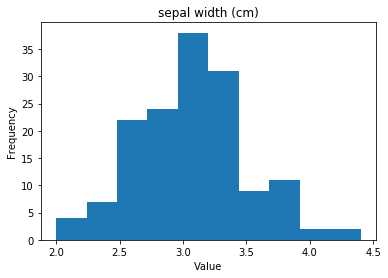

Results: sepal width (cm)
p = 0.167241
k2 = 3.57664
The null hypothesis cannot be rejected, É UMA DISTRIBUICAO NORMAL
        Statistic 3.576642  --  pvalue 0.167241


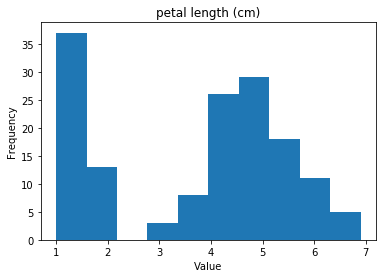

Results: petal length (cm)
p = 8.67787e-49
k2 = 221.332
The null hypothesis can be rejected, NÃO É UMA DISTRIBUICAO NORMAL
        Statistic 221.331787  --  pvalue 0.000000


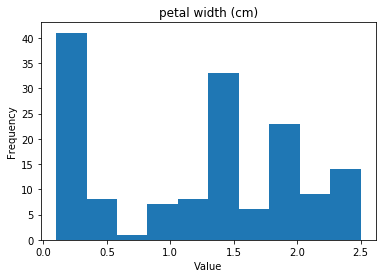

Results: petal width (cm)
p = 1.99181e-30
k2 = 136.777
The null hypothesis can be rejected, NÃO É UMA DISTRIBUICAO NORMAL
        Statistic 136.777018  --  pvalue 0.000000
 OBSERVACOES SOBRE RESULTADO

        statistic : float or array
            s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.

        pvalue : float or array
            A 2-sided chi squared probability for the hypothesis test.
    


In [61]:
test_normal_results(x_values)